<h1>SPRINT 2</h1>


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns


#**SPRINT 2 RELEASE**


In [ ]:
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import re
from math import sqrt
from sklearn.metrics import mean_squared_error

In [ ]:
print(ratings_data.shape)
ratings_data.head()

(100000, 4)


,user_id,movie_id,rating,movie_title
0,196,242,3.0,Kolya
1,63,242,3.0,Kolya
2,226,242,5.0,Kolya
3,154,242,3.0,Kolya
4,306,242,5.0,Kolya


In [ ]:
movie_rating = ratings_data.dropna(axis = 0, subset = ["movie_title"])
movie_rating_count = movie_rating.groupby(["movie_title"])["rating"].count().reset_index().rename(columns = {'rating': 'total_rating_count'})
movie_rating_count.head()

,movie_title,total_rating_count
0,'Til There Was You,9
1,1-900,5
2,101 Dalmatians,109
3,12 Angry Men,125
4,187,41


In [ ]:
ratings_data = ratings_data.merge(movie_rating_count, on="movie_title", how="right")

In [ ]:
ratings_data.head()

,user_id,movie_id,rating,movie_title,total_rating_count
0,223,1300,1.0,'Til There Was You,9
1,178,1300,3.0,'Til There Was You,9
2,342,1300,1.0,'Til There Was You,9
3,530,1300,2.0,'Til There Was You,9
4,416,1300,3.0,'Til There Was You,9


In [ ]:
ratings_data.total_rating_count.describe()

count    100000.000000
mean        169.657920
std         122.253371
min           1.000000
25%          72.000000
50%         147.000000
75%         241.000000
max         583.000000
Name: total_rating_count, dtype: float64

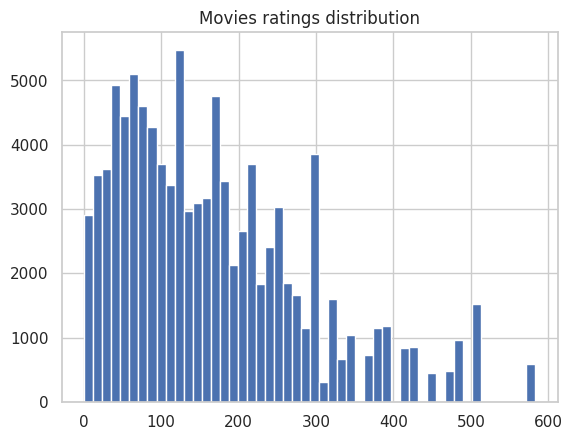

In [ ]:
plt.hist(ratings_data.total_rating_count, bins=50)
plt.title("Movies ratings distribution")
plt.show()

In [ ]:
ratings_threshold = 100
rating_popular_movies_df = ratings_data.loc[ratings_data.total_rating_count >= ratings_threshold]
print(rating_popular_movies_df.shape)
rating_popular_movies_df.head()

(65158, 5)


,user_id,movie_id,rating,movie_title,total_rating_count
14,5,225,2.0,101 Dalmatians,109
15,243,225,3.0,101 Dalmatians,109
16,200,225,4.0,101 Dalmatians,109
17,280,225,4.0,101 Dalmatians,109
18,1,225,2.0,101 Dalmatians,109


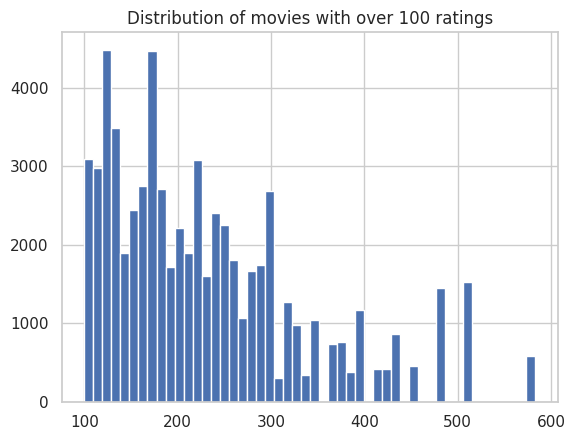

,user_id,movie_id,rating,movie_title,total_rating_count
14,5,225,2.0,101 Dalmatians,109
15,243,225,3.0,101 Dalmatians,109
16,200,225,4.0,101 Dalmatians,109
17,280,225,4.0,101 Dalmatians,109
18,1,225,2.0,101 Dalmatians,109
...,...,...,...,...,...
99894,399,232,2.0,Young Guns,101
99895,897,232,5.0,Young Guns,101
99896,781,232,3.0,Young Guns,101
99897,627,232,3.0,Young Guns,101


In [ ]:
plt.hist(rating_popular_movies_df.total_rating_count, bins=50)
plt.title("Distribution of movies with over 100 ratings")
plt.show()
rating_popular_movies_df

In [ ]:
user_features_df = rating_popular_movies_df.pivot_table(index="user_id", columns="movie_title", values="rating").fillna(0.0)
movie_features_df = rating_popular_movies_df.pivot_table(index="movie_title", columns="user_id", values="rating").fillna(0.0)

In [ ]:
user_features_matrix = csr_matrix(user_features_df)
movie_features_matrix = csr_matrix(movie_features_df)

In [ ]:
  model_knn1 = NearestNeighbors(metric = "cosine", algorithm = "brute", n_neighbors = 20, n_jobs=-1)
  model_knn1.fit(user_features_matrix)


NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [ ]:
user_features_df.shape

(943, 338)

In [ ]:
user_features_df.head(10)

movie_title,101 Dalmatians,12 Angry Men,2001: A Space Odyssey,Absolute Power,"Abyss, The",Ace Ventura: Pet Detective,"Adventures of Priscilla, Queen of the Desert, The","African Queen, The",Air Force One,Aladdin,...,Welcome to the Dollhouse,What's Eating Gilbert Grape,When Harry Met Sally...,While You Were Sleeping,William Shakespeare's Romeo and Juliet,Willy Wonka and the Chocolate Factory,"Wizard of Oz, The","Wrong Trousers, The",Young Frankenstein,Young Guns
user_id,,,,,,,,,,,,,,,,,,,,,
1,2.0,5.0,4.0,0.0,3.0,3.0,0.0,0.0,0.0,4.0,...,5.0,4.0,5.0,4.0,0.0,4.0,4.0,5.0,5.0,3.0
2,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,...,0.0,0.0,1.0,1.0,1.0,3.0,0.0,5.0,4.0,0.0
6,0.0,4.0,5.0,0.0,0.0,0.0,0.0,4.0,0.0,2.0,...,0.0,0.0,5.0,0.0,0.0,3.0,5.0,4.0,4.0,0.0
7,0.0,4.0,5.0,0.0,5.0,0.0,4.0,5.0,4.0,0.0,...,5.0,0.0,4.0,0.0,3.0,4.0,5.0,0.0,5.0,3.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
query_index = np.random.choice(user_features_df.shape[0])
print(query_index)

298


In [ ]:
distances, indices = model_knn1.kneighbors(user_features_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

In [ ]:
user_ids = []
for index in range(0, len(distances.flatten())):
    user_ids.append(user_features_df.index[indices.flatten()[index]])
    if index == 0: # the movie chosen
        print(f"Users similar with user having user_id:  {user_features_df.index[query_index]}")
        print("---------------------------------------------------------")
    else:
        print(f"{index}: {user_features_df.index[indices.flatten()[index]]} (dist: {distances.flatten()[index]})")

Users similar with user having user_id:  299
---------------------------------------------------------
1: 537 (dist: 0.32240717161822063)
2: 334 (dist: 0.3456954890536472)
3: 18 (dist: 0.3481627992772738)
4: 234 (dist: 0.36712039177252964)
5: 437 (dist: 0.3675480597844377)


In [ ]:
print(user_ids)

[299, 537, 334, 18, 234, 437]


In [ ]:
# select movies that were highly ranked by the most similar users.

# look only for movies highly rated by the similar users, not the current user
candidate_user_ids = user_ids[1:]
sel_ratings = rating_popular_movies_df.loc[rating_popular_movies_df.user_id.isin(candidate_user_ids)]
# sort by best ratings and total rating count
sel_ratings = sel_ratings.sort_values(by=["rating", "total_rating_count"], ascending=False)
# eliminate from the selection movies that were ranked already by the current user
movies_rated_by_targeted_user = list(rating_popular_movies_df.loc[rating_popular_movies_df.user_id==user_ids[0]]["movie_id"].values)
sel_ratings = sel_ratings.loc[~sel_ratings.movie_id.isin(movies_rated_by_targeted_user)]
# aggregate and count total ratings and total total_rating_count
agg_sel_ratings = sel_ratings.groupby(["movie_title", "rating"])["total_rating_count"].max().reset_index()
agg_sel_ratings.columns = ["movie_title", "rating", "total_ratings"]
agg_sel_ratings = agg_sel_ratings.sort_values(by=["rating", "total_ratings"], ascending=False)
# only select top n (default top 10 here)
rec_list = agg_sel_ratings["movie_title"].head(10).values
print(f"\nMovies recommended to user: {indices[0][0]}\n---------------------------------")
for i, rec in enumerate(rec_list):
    print(f"{i+1}: {rec}")


Movies recommended to user: 298
---------------------------------
1: Full Monty, The
2: Dead Man Walking
3: Braveheart
4: Shawshank Redemption, The
5: Wizard of Oz, The
6: Babe
7: To Kill a Mockingbird
8: Godfather: Part II, The
9: Shining, The
10: Lone Star


In [ ]:
def recommenduserbased(user_id=10):
    n_users=5
    rec_top_n=10
    distances, indices = model_knn1.kneighbors(user_features_df.loc[user_features_df.index==user_id].values.reshape(1, -1), n_neighbors = n_users + 1)
    user_ids = []
    for index in range(0, len(distances.flatten())):
        user_ids.append(user_features_df.index[indices.flatten()[index]])
        if index == 0: # the movie chosen
            print(f"Users similar with user having user_id: {user_id}")
            print("---------------------------------------------------------")
        else:
            print(f"{index}: {user_features_df.index[indices.flatten()[index]]} (dist: {distances.flatten()[index]})")

    # select movies that were highly ranked by the most similar users.

    # look only for movies highly rated by the similar users, not the current user
    candidate_user_ids = user_ids[1:]
    sel_ratings = rating_popular_movies_df.loc[rating_popular_movies_df.user_id.isin(candidate_user_ids)]
    # sort by best ratings and total rating count
    sel_ratings = sel_ratings.sort_values(by=["rating", "total_rating_count"], ascending=False)
    # eliminate from the selection movies that were ranked already by the current user
    movies_rated_by_targeted_user = list(rating_popular_movies_df.loc[rating_popular_movies_df.user_id==user_ids[0]]["movie_id"].values)
    sel_ratings = sel_ratings.loc[~sel_ratings.movie_id.isin(movies_rated_by_targeted_user)]
    # aggregate and count total ratings and total total_rating_count
    agg_sel_ratings = sel_ratings.groupby(["movie_title", "rating"])["total_rating_count"].max().reset_index()
    agg_sel_ratings.columns = ["movie_title", "rating", "total_ratings"]
    agg_sel_ratings = agg_sel_ratings.sort_values(by=["rating", "total_ratings"], ascending=False)
    # only select top n (default top 10 here)
    rec_list = agg_sel_ratings["movie_title"].head(10).values
    print(f"\nMovies recommended to user_id: {user_ids[0]}\n---------------------------------")
    for i, rec in enumerate(rec_list):
        print(f"{i+1}: {rec}")

In [ ]:
model_knn2 = NearestNeighbors(metric = "cosine", algorithm = "brute", n_neighbors = 20, n_jobs=-1)
model_knn2.fit(movie_features_matrix)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [ ]:
query_index1 = np.random.choice(movie_features_df.shape[0])
print(query_index1)


297


In [ ]:
distances, indices = model_knn2.kneighbors(movie_features_df.iloc[query_index1,:].values.reshape(1, -1), n_neighbors = 6)

In [ ]:
for index in range(0, len(distances.flatten())):
    if index == 0: # the movie chosen
        print(f"Recommendation for {movie_features_df.index[query_index1]} (dist: {distances.flatten()[index]})")
        print("---------------------------------------------------------")
    else:
        print(f"{index}: {movie_features_df.index[indices.flatten()[index]]} (dist: {distances.flatten()[index]})")

Recommendation for Starship Troopers (dist: 0.0)
---------------------------------------------------------
1: Contact (dist: 0.5233901235303625)
2: Alien: Resurrection (dist: 0.5458184582002966)
3: Conspiracy Theory (dist: 0.5494723330289168)
4: Scream (dist: 0.5558423464323465)
5: Tomorrow Never Dies (dist: 0.5571523070269266)


In [ ]:
def recommenditembased(query_index=10):
    top_n=10
    distances, indices = model_knn2.kneighbors(movie_features_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = top_n+1)
    for index in range(0, len(distances.flatten())):
        if index == 0: # the movie chosen
            print(f"Recommendation for {movie_features_df.index[query_index]} (dist: {distances.flatten()[index]})")
            print("---------------------------------------------------------")
        else:
            print(f"{index}: {movie_features_df.index[indices.flatten()[index]]} (dist: {distances.flatten()[index]})")

In [ ]:
def recommend_item_based(movie_title, top_n=10):
    # Check if the movie_title exists in the dataset
    if movie_title not in movie_features_df.index:
        print(f"The movie '{movie_title}' was not found in the dataset.")
        return

    # Find the query_index for the given movie_title
    query_index = movie_features_df.index.get_loc(movie_title)

    distances, indices = model_knn2.kneighbors(movie_features_df.iloc[query_index, :].values.reshape(1, -1), n_neighbors=top_n + 1)

    for index in range(0, len(distances.flatten())):
        if index == 0:  # the movie chosen
            print(f"Recommendation for {movie_features_df.index[query_index]} (dist: {distances.flatten()[index]})")
            print("---------------------------------------------------------")
        else:
            print(f"{index}: {movie_features_df.index[indices.flatten()[index]]} (dist: {distances.flatten()[index]})")

movie_name = input("Enter movie name: ")
recommend_item_based(movie_name, 10)


Enter movie name: Wizard of Oz, The
Recommendation for Wizard of Oz, The (dist: 2.9976021664879227e-15)
---------------------------------------------------------
1: E.T. the Extra-Terrestrial (dist: 0.33778015692873165)
2: Forrest Gump (dist: 0.34049753729053545)
3: Gone with the Wind (dist: 0.34087250378442246)
4: It's a Wonderful Life (dist: 0.34352560288097234)
5: Raiders of the Lost Ark (dist: 0.34654082224622074)
6: Casablanca (dist: 0.3620160009475486)
7: Empire Strikes Back, The (dist: 0.3667412498567403)
8: Back to the Future (dist: 0.3698348159062257)
9: Field of Dreams (dist: 0.37689775611422915)
10: Sound of Music, The (dist: 0.37976309375115114)


In [ ]:
k=int(input("Enter user id:"))
recommenduserbased(k)

Enter user id:154
Users similar with user having user_id: 154
---------------------------------------------------------
1: 498 (dist: 0.5093749121325828)
2: 6 (dist: 0.5172043234337746)
3: 666 (dist: 0.5311574054020886)
4: 537 (dist: 0.5500037910518658)
5: 325 (dist: 0.5552884455760694)

Movies recommended to user_id: 154
---------------------------------
1: Fargo
2: Godfather, The
3: Pulp Fiction
4: Silence of the Lambs, The
5: Princess Bride, The
6: Full Monty, The
7: Schindler's List
8: Alien
9: When Harry Met Sally...
10: Wizard of Oz, The
